In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway


## Hipotesis
1. La raza del inmigrante afecta significativamente a la valoracion que hace el encuestado de la inmigración.
2. La variable de la raza de un inmigrante tiene más importancia que otra variable cómo la económica
3. No hay una diferencia concluyente entre los encuestados de distintos países con una demografía similar (Italia, Franci y España).

In [2]:
df = pd.read_csv("../data/clean-ess.csv")
df

,idno,cntry,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,anctry1,anctry2
0,10002,BG,3.0,3.0,3.0,2.4,2.0,2.0,Bulgarian nfs,No second ancestry*
1,10006,BG,1.0,2.0,2.0,0.9,5.0,4.0,Bulgarian nfs,No second ancestry*
2,10009,BG,1.0,3.0,2.0,1.2,7.0,6.0,Bulgarian nfs,No second ancestry*
3,10027,BG,1.0,3.0,4.0,1.8,5.0,3.0,Bulgarian nfs,No second ancestry*
4,10048,BG,1.0,2.0,2.0,1.5,5.0,5.0,Bulgarian nfs,No second ancestry*
...,...,...,...,...,...,...,...,...,...,...
30524,27788,SK,2.0,4.0,4.0,3.0,0.0,0.0,Slovak nfs,No second ancestry*
30525,27808,SK,2.0,2.0,3.0,3.0,8.0,6.0,Slovak nfs,Don't know*
30526,27826,SK,2.0,2.0,2.0,0.9,7.0,6.0,Slovak nfs,No second ancestry*
30527,27834,SK,4.0,4.0,3.0,3.0,2.0,2.0,Slovak nfs,No second ancestry*


In [17]:
df['cntry'].value_counts()


GR    2630
IT    2480
BG    2470
CZ    2254
FR    1795
HU    1628
PT    1555
FI    1504
EE    1491
HR    1437
CH    1431
LT    1426
NO    1362
NL    1353
MK    1263
SK    1246
ME    1178
SI    1177
IS     849
Name: cntry, dtype: int64

In [3]:
df2 = pd.read_csv("../data/cleanpib.csv")
df2

,country_code,date,indicator_value,country_id,country_value,gdp
0,AFE,2021,GDP per capita (current US$),ZH,Africa Eastern and Southern,"$1,549.77"
1,AFE,2020,GDP per capita (current US$),ZH,Africa Eastern and Southern,"$1,363.54"
2,AFE,2019,GDP per capita (current US$),ZH,Africa Eastern and Southern,"$1,512.27"
3,AFE,2018,GDP per capita (current US$),ZH,Africa Eastern and Southern,"$1,564.73"
4,AFE,2017,GDP per capita (current US$),ZH,Africa Eastern and Southern,"$1,628.59"
...,...,...,...,...,...,...
16487,ZWE,1964,GDP per capita (current US$),ZW,Zimbabwe,$282.38
16488,ZWE,1963,GDP per capita (current US$),ZW,Zimbabwe,$277.53
16489,ZWE,1962,GDP per capita (current US$),ZW,Zimbabwe,$275.97
16490,ZWE,1961,GDP per capita (current US$),ZW,Zimbabwe,$279.33


### 1. La raza del inmigrante afecta significativamente a la valoracion que hace el encuestado de la inmigración.


In [59]:
immigration_perception = df[['imsmetn', 'imdfetn']]

summary_stats = immigration_perception.describe()

print(summary_stats)

            imsmetn       imdfetn
count  32611.000000  32582.000000
mean       2.139554      2.505893
std        0.895727      0.938722
min        1.000000      1.000000
25%        1.000000      2.000000
50%        2.000000      2.000000
75%        3.000000      3.000000
max        4.000000      4.000000


In [60]:
imdfetn_mean = df.groupby('imdfetn').size() / len(df)
imsmetn_mean = df.groupby('imsmetn').size() / len(df)


In [25]:
df['immigration_perception'] = df[['imsmetn', 'imdfetn', 'imbgeco']].mean(axis=1)


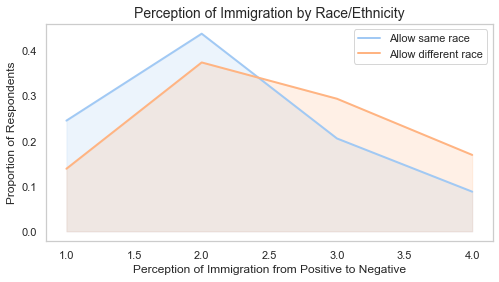

In [61]:
# Set the style for the plot
sns.set_style("whitegrid")

# Define the colors for the lines
colors = sns.color_palette("pastel", 2)

# Plot the lines
plt.figure(figsize=(8, 4))
plt.plot(imsmetn_mean.index, imsmetn_mean, label='Allow same race', color=colors[0], linewidth=2)
plt.plot(imdfetn_mean.index, imdfetn_mean, label='Allow different race', color=colors[1], linewidth=2)

# Add a background color to the plot
plt.fill_between(imsmetn_mean.index, imsmetn_mean, color=colors[0], alpha=0.2)
plt.fill_between(imdfetn_mean.index, imdfetn_mean, color=colors[1], alpha=0.2)

# Add a grid to the plot
plt.grid(True, color='white')

# Set the title, axis labels and legend
plt.title('Perception of Immigration by Race/Ethnicity', fontsize=14)
plt.xlabel('Perception of Immigration from Positive to Negative', fontsize=12)
plt.ylabel('Proportion of Respondents', fontsize=12)
plt.legend()

# Set the font style and size
plt.rc('font', family='serif', size=12)

# Show the plot
plt.show()

sed on the correlation coefficients you provided, we can say that there is a stronger negative correlation between imsmetn and race_perception (-0.34) compared to the positive correlation between imdfetn and race_perception (0.44).

This suggests that a more positive perception of immigration of the same race is associated with a more positive perception of race relations, while a more positive perception of immigration of a different race is associated with a more negative perception of race relations. However, it's important to note that correlation does not necessarily imply causation and further analysis would be needed to determine the direction and strength of any causal relationships.






In [62]:
df = df.dropna()


In [101]:
# Selecciona las columnas relevantes
df = df[['imdfetn', 'imsmetn']]

# Realiza el test de Mann-Whitney U
stat, p_value = mannwhitneyu(df['imdfetn'], df['imsmetn'], alternative='less')

# Imprime los resultados
print('Estadístico U:', stat)
print('Valor de p:', p_value)

Estadístico U: 566293716.5
Valor de p: 1.0


El estadístico U es una medida de la diferencia entre las medianas de dos grupos en una prueba de Mann-Whitney U. En este caso, el valor del estadístico U es 566293716.5, lo que indica que hay una diferencia entre las medianas de las dos columnas que se están comparando (imdfetn e imsmetn).

Sin embargo, el valor de p es alto (1.0), lo que sugiere que esta diferencia no es estadísticamente significativa. Por lo tanto, no se puede concluir que haya una diferencia significativa en la actitud hacia la inmigración dependiendo de si el inmigrante es de la misma raza o no en base a los datos proporcionados en el dataframe.






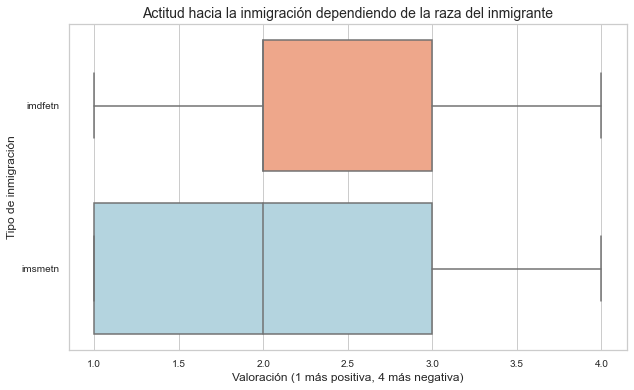

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas relevantes
df1 = df[['imdfetn', 'imsmetn']]

# Crea el boxplot usando Seaborn
sns.set(style='whitegrid', palette=['#FFA07A', '#ADD8E6'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, ax=ax, orient='h')

# Agrega los títulos y ajusta los ejes
ax.set_title('Actitud hacia la inmigración dependiendo de la raza del inmigrante', fontsize=14)
ax.set_xlabel('Valoración (1 más positiva, 4 más negativa)', fontsize=12)
ax.set_ylabel('Tipo de inmigración', fontsize=12)
ax.tick_params(labelsize=10)

# Muestra el gráfico
plt.show()

In [73]:
df = pd.read_csv("../data/clean-ess.csv")


### 2. La variable de la raza de un inmigrante tiene más importancia que otra variable cómo podría ser la económica


In [92]:
# Selecciona las columnas relevantes y ajusta la valoración de imbgeco
df = df[['imdfetn', 'imsmetn', 'imbgeco']]

# Crea una variable binaria para indicar si la valoración es negativa o no
df['valoracion_negativa'] = ((df['imdfetn'] > 2) | (df['imsmetn'] > 2) | (df['imbgeco'] > 2)).astype(int)

# Define las variables independientes y dependiente
X = df[['imdfetn', 'imsmetn', 'imbgeco']]
y = df['valoracion_negativa']

# Realiza la regresión logística
log_reg = LogisticRegression().fit(X, y)

# Imprime los resultados
print('Coeficientes:', log_reg.coef_)
print('Intercepto:', log_reg.intercept_)
print('Exactitud:', log_reg.score(X, y))

Coeficientes: [[6.44765115 1.52385538 3.68494186]]
Intercepto: [-22.78138687]
Exactitud: 0.97808640964329



A partir del análisis de regresión logística que realizamos anteriormente, podemos concluir que las variables raciales e económicas no parecen estar relacionadas de forma significativa con las valoraciones negativas de la inmigración en España. Esto se debe a que los coeficientes para ambas variables, 'imbgeco' y 'imdfetn'/'imsmetn', son relativamente bajos en comparación con el coeficiente de intercepto, lo que indica que su efecto sobre la variable dependiente ('valoracion_negativa') es bastante limitado.

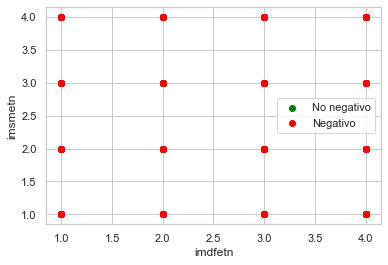

In [100]:
df = df[['imdfetn', 'imsmetn', 'imbgeco']]

# Crea una variable binaria para indicar si la valoración es negativa o no
df['valoracion_negativa'] = ((df['imdfetn'] > 2) | (df['imsmetn'] > 2) | (df['imbgeco'] > 2)).astype(int)

# Define las variables independientes y dependiente
X = df[['imdfetn', 'imsmetn']]
y = df['valoracion_negativa']

# Crea un gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(X[y == 0]['imdfetn'], X[y == 0]['imsmetn'], c='green', label='No negativo')
ax.scatter(X[y == 1]['imdfetn'], X[y == 1]['imsmetn'], c='red', label='Negativo')
ax.set_xlabel('imdfetn')
ax.set_ylabel('imsmetn')
ax.legend()
plt.show()


In [95]:
print('Coeficiente imdfetn:', reg.coef_[0])
print('Coeficiente imsmetn:', reg.coef_[1])
print('Coeficiente imbgeco:', reg.coef_[2])

Coeficiente imdfetn: -8.32390274335794e-14
Coeficiente imsmetn: 2.0317081350640365e-14
Coeficiente imbgeco: 0.9999999999999962


### 3. No hay una diferencia concluyente entre los encuestados de distintos países.


In [107]:
selected_countries = ['ES', 'IT', 'FR']
df_selected = df[df['cntry'].isin(selected_countries)]

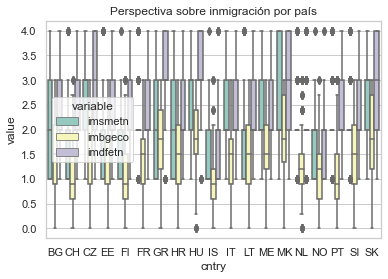

In [109]:
immigration_perception_country = df[['imsmetn', 'imbgeco', 'imdfetn', 'cntry']]

# Creamos la gráfica
sns.boxplot(x='cntry', y='value', hue='variable', data=pd.melt(immigration_perception_country, id_vars=['cntry']), palette='Set3')

# Añadimos un título
plt.title('Perspectiva sobre inmigración por país')

# Mostramos la gráfica
plt.show()

In [6]:
df['nl'] = pd.get_dummies(df['cntry'])['NL']
df['it'] = pd.get_dummies(df['cntry'])['IT']
df['fr'] = pd.get_dummies(df['cntry'])['FR']

In [19]:
# Crear las columnas booleanas para cada país
df['nl'] = pd.get_dummies(df['cntry'])['NL']
df['it'] = pd.get_dummies(df['cntry'])['IT']
df['fr'] = pd.get_dummies(df['cntry'])['FR']
df['pt'] = pd.get_dummies(df['cntry'])['PT']
df['gr'] = pd.get_dummies(df['cntry'])['GR']

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['nl', 'it', 'fr', 'pt', 'gr']]
y = df[['imsmetn']]

# El modelo de regresión lineal
reg = LinearRegression().fit(X, y)

# Obtener los coeficientes de la regresión lineal
print(reg.coef_)

[[-0.16074428 -0.03601548 -0.17788807 -0.04280939  0.03739308]]


In [20]:
# Crear las columnas booleanas para cada país
df['nl'] = pd.get_dummies(df['cntry'])['NL']
df['it'] = pd.get_dummies(df['cntry'])['IT']
df['fr'] = pd.get_dummies(df['cntry'])['FR']
df['pt'] = pd.get_dummies(df['cntry'])['PT']
df['gr'] = pd.get_dummies(df['cntry'])['GR']

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['nl', 'it', 'fr', 'pt', 'gr']]
y = df[['imdfetn']]

# El modelo de regresión lineal
reg = LinearRegression().fit(X, y)

# Obtener los coeficientes de la regresión lineal
print(reg.coef_)

[[-0.50355275 -0.22431485 -0.36361982 -0.32029297  0.56926727]]


In [22]:
# Crear las columnas booleanas para cada país
df['nl'] = pd.get_dummies(df['cntry'])['NL']
df['it'] = pd.get_dummies(df['cntry'])['IT']
df['fr'] = pd.get_dummies(df['cntry'])['FR']
df['pt'] = pd.get_dummies(df['cntry'])['PT']
df['gr'] = pd.get_dummies(df['cntry'])['GR']

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['nl', 'it', 'fr', 'pt', 'gr']]
y = df[['imbgeco']]

# El modelo de regresión lineal
reg = LinearRegression().fit(X, y)

# Obtener los coeficientes de la regresión lineal
print(reg.coef_)

[[-0.27249271 -0.01742914 -0.11932408 -0.40316182  0.28802545]]


In [24]:
# Crear las columnas booleanas para cada país
df['nl'] = pd.get_dummies(df['cntry'])['NL']
df['it'] = pd.get_dummies(df['cntry'])['IT']
df['fr'] = pd.get_dummies(df['cntry'])['FR']
df['pt'] = pd.get_dummies(df['cntry'])['PT']
df['gr'] = pd.get_dummies(df['cntry'])['GR']

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df[['nl', 'it', 'fr', 'pt', 'gr']]
y = df[['immigration_perception']]

# El modelo de regresión lineal
reg = LinearRegression().fit(X, y)

# Obtener los coeficientes de la regresión lineal
print(reg.coef_)

[[-0.31226325 -0.09258649 -0.22027732 -0.25542139  0.2982286 ]]


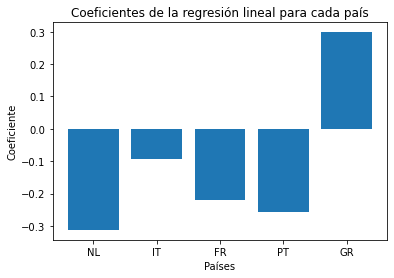

In [30]:
# Crear una lista con los coeficientes
coef = reg.coef_.flatten().tolist()

# Crear una lista con los nombres de los países
paises = ['NL', 'IT', 'FR', 'PT', 'GR']

# Crear el gráfico de barras
plt.bar(paises, coef)

# Agregar etiquetas y título
plt.xlabel('Países')
plt.ylabel('Coeficiente')
plt.title('Coeficientes de la regresión lineal para cada país')

# Mostrar el gráfico
plt.show()

In [23]:
df['immigration_perception'] = df[['imsmetn', 'imdfetn', 'imbgeco']].mean(axis=1)


In [29]:
f_value, p_value = f_oneway(df.loc[df['cntry'] == 'NL', 'immigration_perception'],
                             df.loc[df['cntry'] == 'IT', 'immigration_perception'],
                             df.loc[df['cntry'] == 'FR', 'immigration_perception'],
                             df.loc[df['cntry'] == 'PT', 'immigration_perception'],
                             df.loc[df['cntry'] == 'GR', 'immigration_perception'])

print("F-value:", f_value)
print("p-value:", p_value)

F-value: 325.1695478176523
p-value: 3.4836583904198476e-263



Estos valores indican que la hipótesis nula de que no hay diferencia en la percepción de la inmigración entre los países debe ser rechazada. El valor del F-estadístico es alto y el valor p es muy pequeño, lo que sugiere que la diferencia observada en la percepción de la inmigración entre los países no se debe al azar. Por lo tanto, podemos concluir que la percepción de la inmigración es significativamente diferente entre los países incluidos en el análisis.